# Proyecto de Aprendizaje Supervisado
- Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de clasificación.
- Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

### 1. Librerías a básicas utilizar

In [128]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### 2. Diccionario de datos

country / city
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
target



### 3. Lectura de los datos

Capturamos los datos a partir de un archivo csv. Al no tener los nombres de las columnas pero sí un diccionario de datos, renombramos al momento de obtener el dataframe.

In [129]:
df = pd.read_csv('DatosCorazon.csv',names=[
	'country',
	'age',
	'sex',
	'chest_pain_type',
	'resting_blood_pressure',
	'serum_cholestoral',
	'fasting_blood_sugar',
	'resting_electrocardiographic_results',
	'maximum_heart_rate_achieved',
	'exercise_induced_angina',
	'oldpeak',
	'the_slope_of_the_peak_exercise_ST_segment',
	'number_of_major_vessels',
	'thal',
	'target',
],index_col=False, delimiter=';')
df

,country,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,the_slope_of_the_peak_exercise_ST_segment,number_of_major_vessels,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Suiza,70.0,1,4,115,0,0,1,92,1,0,2,?,7,1
716,Suiza,70.0,1,4,140,0,1,0,157,1,2,2,?,7,3
717,Suiza,72.0,1,3,160,0,?,2,114,0,1.6,2,2,?,0
718,Suiza,73.0,0,3,160,0,0,1,121,0,0,1,?,3,1


### 4. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

In [130]:
df.columns

Index(['country', 'age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak',
       'the_slope_of_the_peak_exercise_ST_segment', 'number_of_major_vessels',
       'thal', 'target'],
      dtype='object')

### 4.1 Limpieza de datos

### Valores faltantes y tipos de datos

Vamos a revisar los datos faltantes (explícitos e implícitos)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    int64  
 3   chest_pain_type                            720 non-null    int64  
 4   resting_blood_pressure                     720 non-null    object 
 5   serum_cholestoral                          720 non-null    object 
 6   fasting_blood_sugar                        720 non-null    object 
 7   resting_electrocardiographic_results       720 non-null    object 
 8   maximum_heart_rate_achieved                720 non-null    object 
 9   exercise_induced_angina                    720 non-null    object 
 10  oldpeak                   

In [132]:
df.isnull().sum()

country                                      0
age                                          0
sex                                          0
chest_pain_type                              0
resting_blood_pressure                       0
serum_cholestoral                            0
fasting_blood_sugar                          0
resting_electrocardiographic_results         0
maximum_heart_rate_achieved                  0
exercise_induced_angina                      0
oldpeak                                      0
the_slope_of_the_peak_exercise_ST_segment    0
number_of_major_vessels                      0
thal                                         0
target                                       0
dtype: int64

Al revisar los datos básicos observamos que a primera vista no existen datos faltantes. 

In [133]:
df.head()

,country,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,the_slope_of_the_peak_exercise_ST_segment,number_of_major_vessels,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


Pero, tan sólo al analizar los primeros registros del dataset (e.g. normalized_losses), nos damos cuenta de datos con valores = ?. Esto, claramente, puede indicar datos faltantes. Para ratificar esta sospecha, tenemos que mirar en que columnas pueden estar apareciendo estos valores.

In [134]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en country con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en serum_cholestoral con el valor ?
Existen 83 valores en fasting_blood_sugar con el valor ?
Existen 2 valores en resting_electrocardiographic_results con el valor ?
Existen 2 valores en maximum_heart_rate_achieved con el valor ?
Existen 2 valores en exercise_induced_angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en the_slope_of_the_peak_exercise_ST_segment con el valor ?
Existen 413 valores en number_of_major_vessels con el valor ?
Existen 320 valores en thal con el valor ?


- Contamos, de todas las variables de tipo objeto (pues son las únicas que pueden contener un valor ?), contamos los valores en los que un valor ? aparece.

- A partir de los resutados podemos observar que existen 7 variables con valores de este tipo.

- Al tener tan pocos registros, no es bueno eliminar, así sean tan pocos, pero si queremos imputarlos debemos cambiarlos a nan

- De igual manera no podemos cambiar el valor de una variable categórica a numérica si existen datos con ?

- Cambiaremos los valores ? por nan, pero primero revisaremos tipos de datos inadecuados para todas las variables del dataset.

- Revisando detalladamente encontramos incongruencias ya que algunas variables tienen datos de distinto tipo al manifestado en el diccionario de datos
    - symboling debería ser categórico
    - normalized-losses debería ser númerico y no categórico
    - bore (diámetro del motor) debería ser numérico
    - stroke debe ser numérico
    - horse-power debe ser numérico
    - peak-rpm debe ser numérico
    - price debe ser numérico

In [135]:
df.dtypes

country                                       object
age                                          float64
sex                                            int64
chest_pain_type                                int64
resting_blood_pressure                        object
serum_cholestoral                             object
fasting_blood_sugar                           object
resting_electrocardiographic_results          object
maximum_heart_rate_achieved                   object
exercise_induced_angina                       object
oldpeak                                       object
the_slope_of_the_peak_exercise_ST_segment     object
number_of_major_vessels                       object
thal                                          object
target                                         int64
dtype: object

Antes de meternos la limpieza de datos debemos ver como están distribuidas las categorías de la clase objetivo target. Es importante conocer si nuestro conjunto de datos se encuentra balanceado o no.

<AxesSubplot: xlabel='target', ylabel='count'>

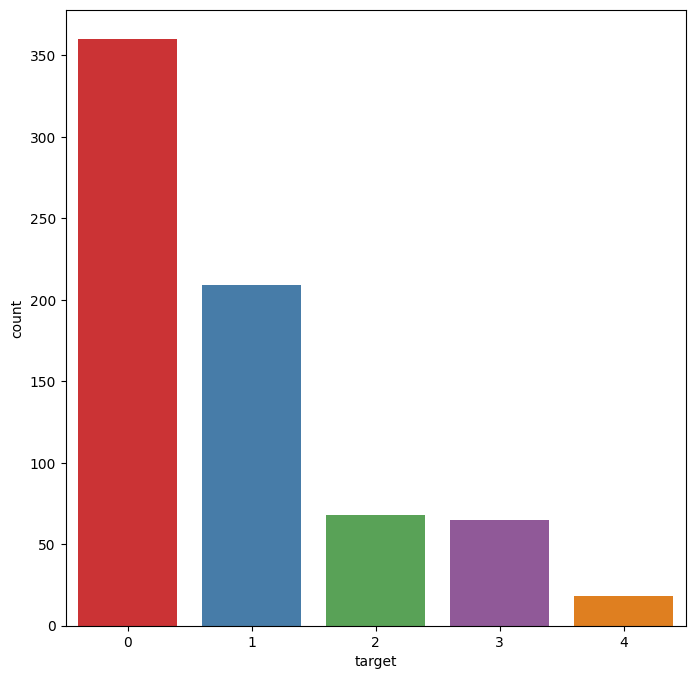

In [136]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=df, palette = "Set1")

Construímos una tabla para ver las cantidades para cada categoría

In [137]:
pd.crosstab(index=df["target"], columns="count")

col_0,count
target,
0,360
1,209
2,68
3,65
4,18


Creamos una función para cambiar los tipos de las variables independientes. Igualmente hacemos uso de un diccionario para transformar nuestros valores categóricos ordinales a numéricos.

In [138]:
# # Creamos un Transformer personalizado formatea la variable objetivo
# # Agrupamos valores con riesgo negativo
# # Convertimos el tipo de la variable objetivo a categórica

# from sklearn.base import BaseEstimator, TransformerMixin

# class Format_target(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         result = X.copy()
#         result.loc[(result['target'] < 0), "target"] = -1
#         result['target'] = result['target'].astype(int).astype(str)
#         return result

In [139]:
df['target'] = df['target'].astype(str)
df['sex'] = df['sex'].astype(str)
df['chest_pain_type'] = df['chest_pain_type'].astype(str)


In [140]:
# df_modified = Format_target().fit_transform(df)

In [141]:
# plt.figure(figsize=(8,8))
# # sns.countplot(x='target',data=df_modified, palette='Set1')

In [142]:
# # Vemos la tabla luego del cambio

# pd.crosstab(index=df_modified["symboling"], columns="count")


Nuestro conjunto de datos parece más balanceado con respecto a la variable objetivo. Incluso, antes de realizar más cambios podemos observar la línea base que servirá como punto de partida  para los modelos que vamos a implementar. Al estar trabajando con una tarea de clasificación, utilizamos la clase mayoritaria, en este caso es el riesgo neutro.

In [143]:
# df_modified['symboling'][df_modified['symboling'] == '0'].count()/df.shape[0]*100

In [144]:
len(df[df['number_of_major_vessels'] == '?'])

413

Ahora trabajaremos con los problemas encontrados en las variables independientes con respecto a valores que podrían ser faltantes y tipos de datos distintos a los indicados en el diccionario de datos.

In [145]:
def convert(df,columns,val):
    result = df.copy()
    for col in columns:
        result[col] = result[col].astype(val)
    return result


In [146]:
obj_columns = df.columns[~df.columns.isin(['country','sex','chest_pain_type','fasting_blood_sugar','number_of_major_vessels', 'target'])]
obj_columns

Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak',
       'the_slope_of_the_peak_exercise_ST_segment', 'thal', 'target'],
      dtype='object')

In [147]:
# Creamos un Transformer personalizado que nos cambia los valores ? por nulos
# Igualmente nos modifica los tipos de variables errados
class Format_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.replace('?',np.nan)
        result = convert(result,obj_columns ,'float64')
        return result

In [148]:
df_modified = Format_variables().fit_transform(df)

In [149]:
# Verificamos que los tipos de datos son los correctos
# Asimismo nos damos cuenta que ahora sí tenemos datos faltantes
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    object 
 3   chest_pain_type                            720 non-null    object 
 4   resting_blood_pressure                     717 non-null    float64
 5   serum_cholestoral                          697 non-null    float64
 6   fasting_blood_sugar                        637 non-null    object 
 7   resting_electrocardiographic_results       718 non-null    float64
 8   maximum_heart_rate_achieved                718 non-null    float64
 9   exercise_induced_angina                    718 non-null    float64
 10  oldpeak                   

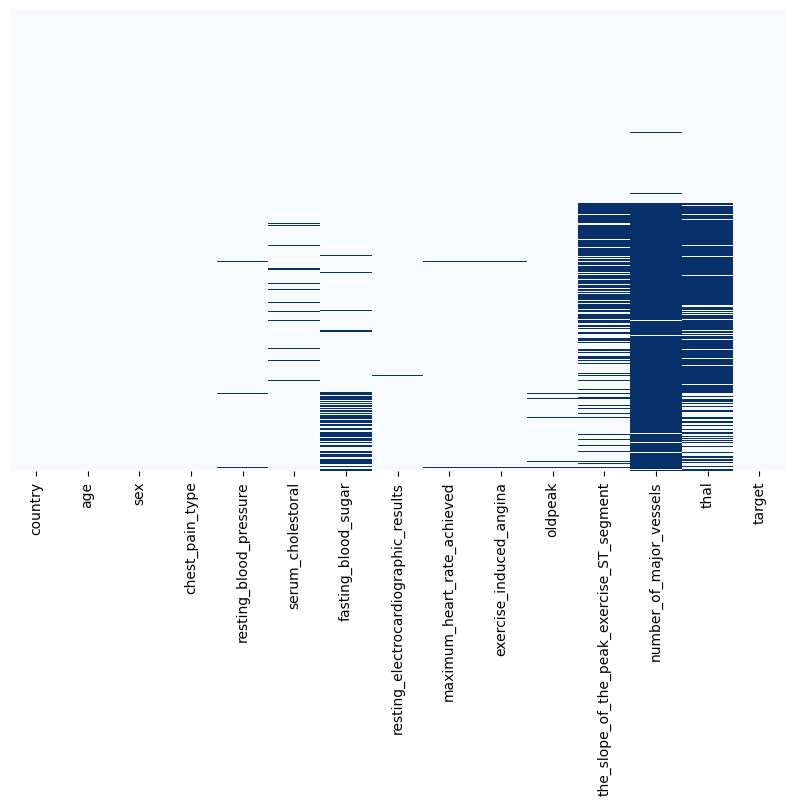

In [150]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_modified.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

(se imputan los datos, pero segun nuestro criterio creemos más apropiado la eliminación de la columna completamente 👍)

In [151]:
df_modified.isnull().sum()

country                                        0
age                                            0
sex                                            0
chest_pain_type                                0
resting_blood_pressure                         3
serum_cholestoral                             23
fasting_blood_sugar                           83
resting_electrocardiographic_results           2
maximum_heart_rate_achieved                    2
exercise_induced_angina                        2
oldpeak                                        6
the_slope_of_the_peak_exercise_ST_segment    207
number_of_major_vessels                      413
thal                                         320
target                                         0
dtype: int64

In [152]:
df_modified

,country,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,the_slope_of_the_peak_exercise_ST_segment,number_of_major_vessels,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2.0,150.0,0.0,2.3,3.0,0,6.0,0.0
1,Cleveland,67.0,1,4,160.0,286.0,0,2.0,108.0,1.0,1.5,2.0,3,3.0,2.0
2,Cleveland,67.0,1,4,120.0,229.0,0,2.0,129.0,1.0,2.6,2.0,2,7.0,1.0
3,Cleveland,37.0,1,3,130.0,250.0,0,0.0,187.0,0.0,3.5,3.0,0,3.0,0.0
4,Cleveland,41.0,0,2,130.0,204.0,0,2.0,172.0,0.0,1.4,1.0,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Suiza,70.0,1,4,115.0,0.0,0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1.0
716,Suiza,70.0,1,4,140.0,0.0,1,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3.0
717,Suiza,72.0,1,3,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2,NaN,0.0
718,Suiza,73.0,0,3,160.0,0.0,0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1.0


In [153]:
# Creamos un Transformer personalizado que nos imputa los valores faltantes
# Utiliza la media para columnas numéricas y la moda para las categóricas
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cont, cat):
        self.cont = cont
        self.cat = cat

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for c in self.cont:
            avg = result[c].mean(axis=0)
            result[c].replace(np.nan,avg,inplace=True)
        for c in self.cat:
            mode = result[c].value_counts().idxmax()
            result[c].replace(np.nan,mode,inplace=True)
        return result

In [154]:
# get float values
cont = df_modified.select_dtypes(include=['float64']).columns
# get object values
cat = df_modified.select_dtypes(include=['object']).columns

In [155]:
df_modified = Imputer(cont,cat).fit_transform(df_modified)

In [156]:
df_modified.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    object 
 3   chest_pain_type                            720 non-null    object 
 4   resting_blood_pressure                     720 non-null    float64
 5   serum_cholestoral                          720 non-null    float64
 6   fasting_blood_sugar                        720 non-null    object 
 7   resting_electrocardiographic_results       720 non-null    float64
 8   maximum_heart_rate_achieved                720 non-null    float64
 9   exercise_induced_angina                    720 non-null    float64
 10  oldpeak                   

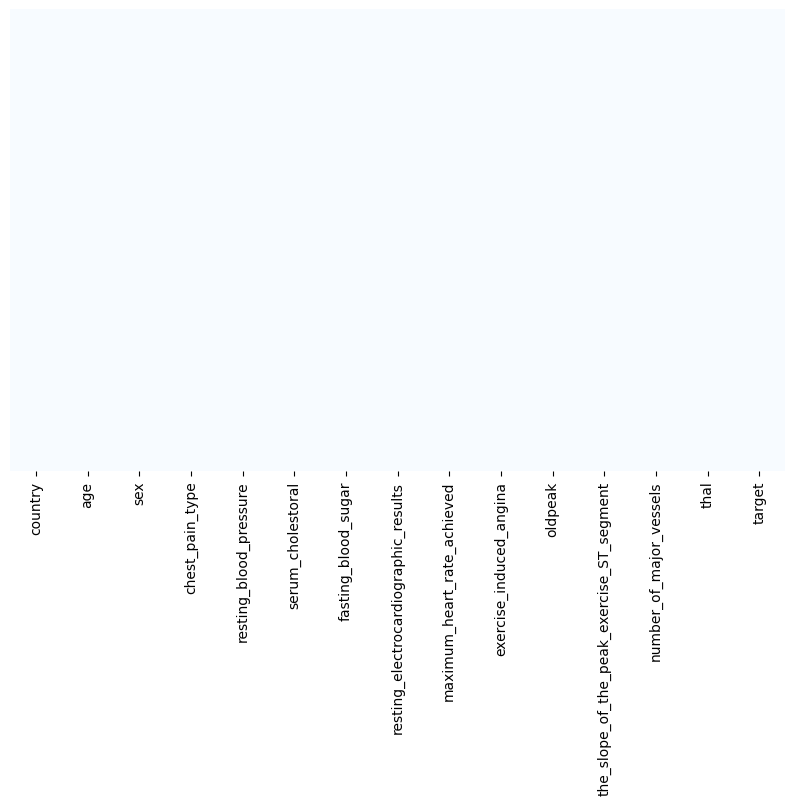

In [157]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_modified.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Observamos que ya no contamos con valores faltantes.

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [158]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

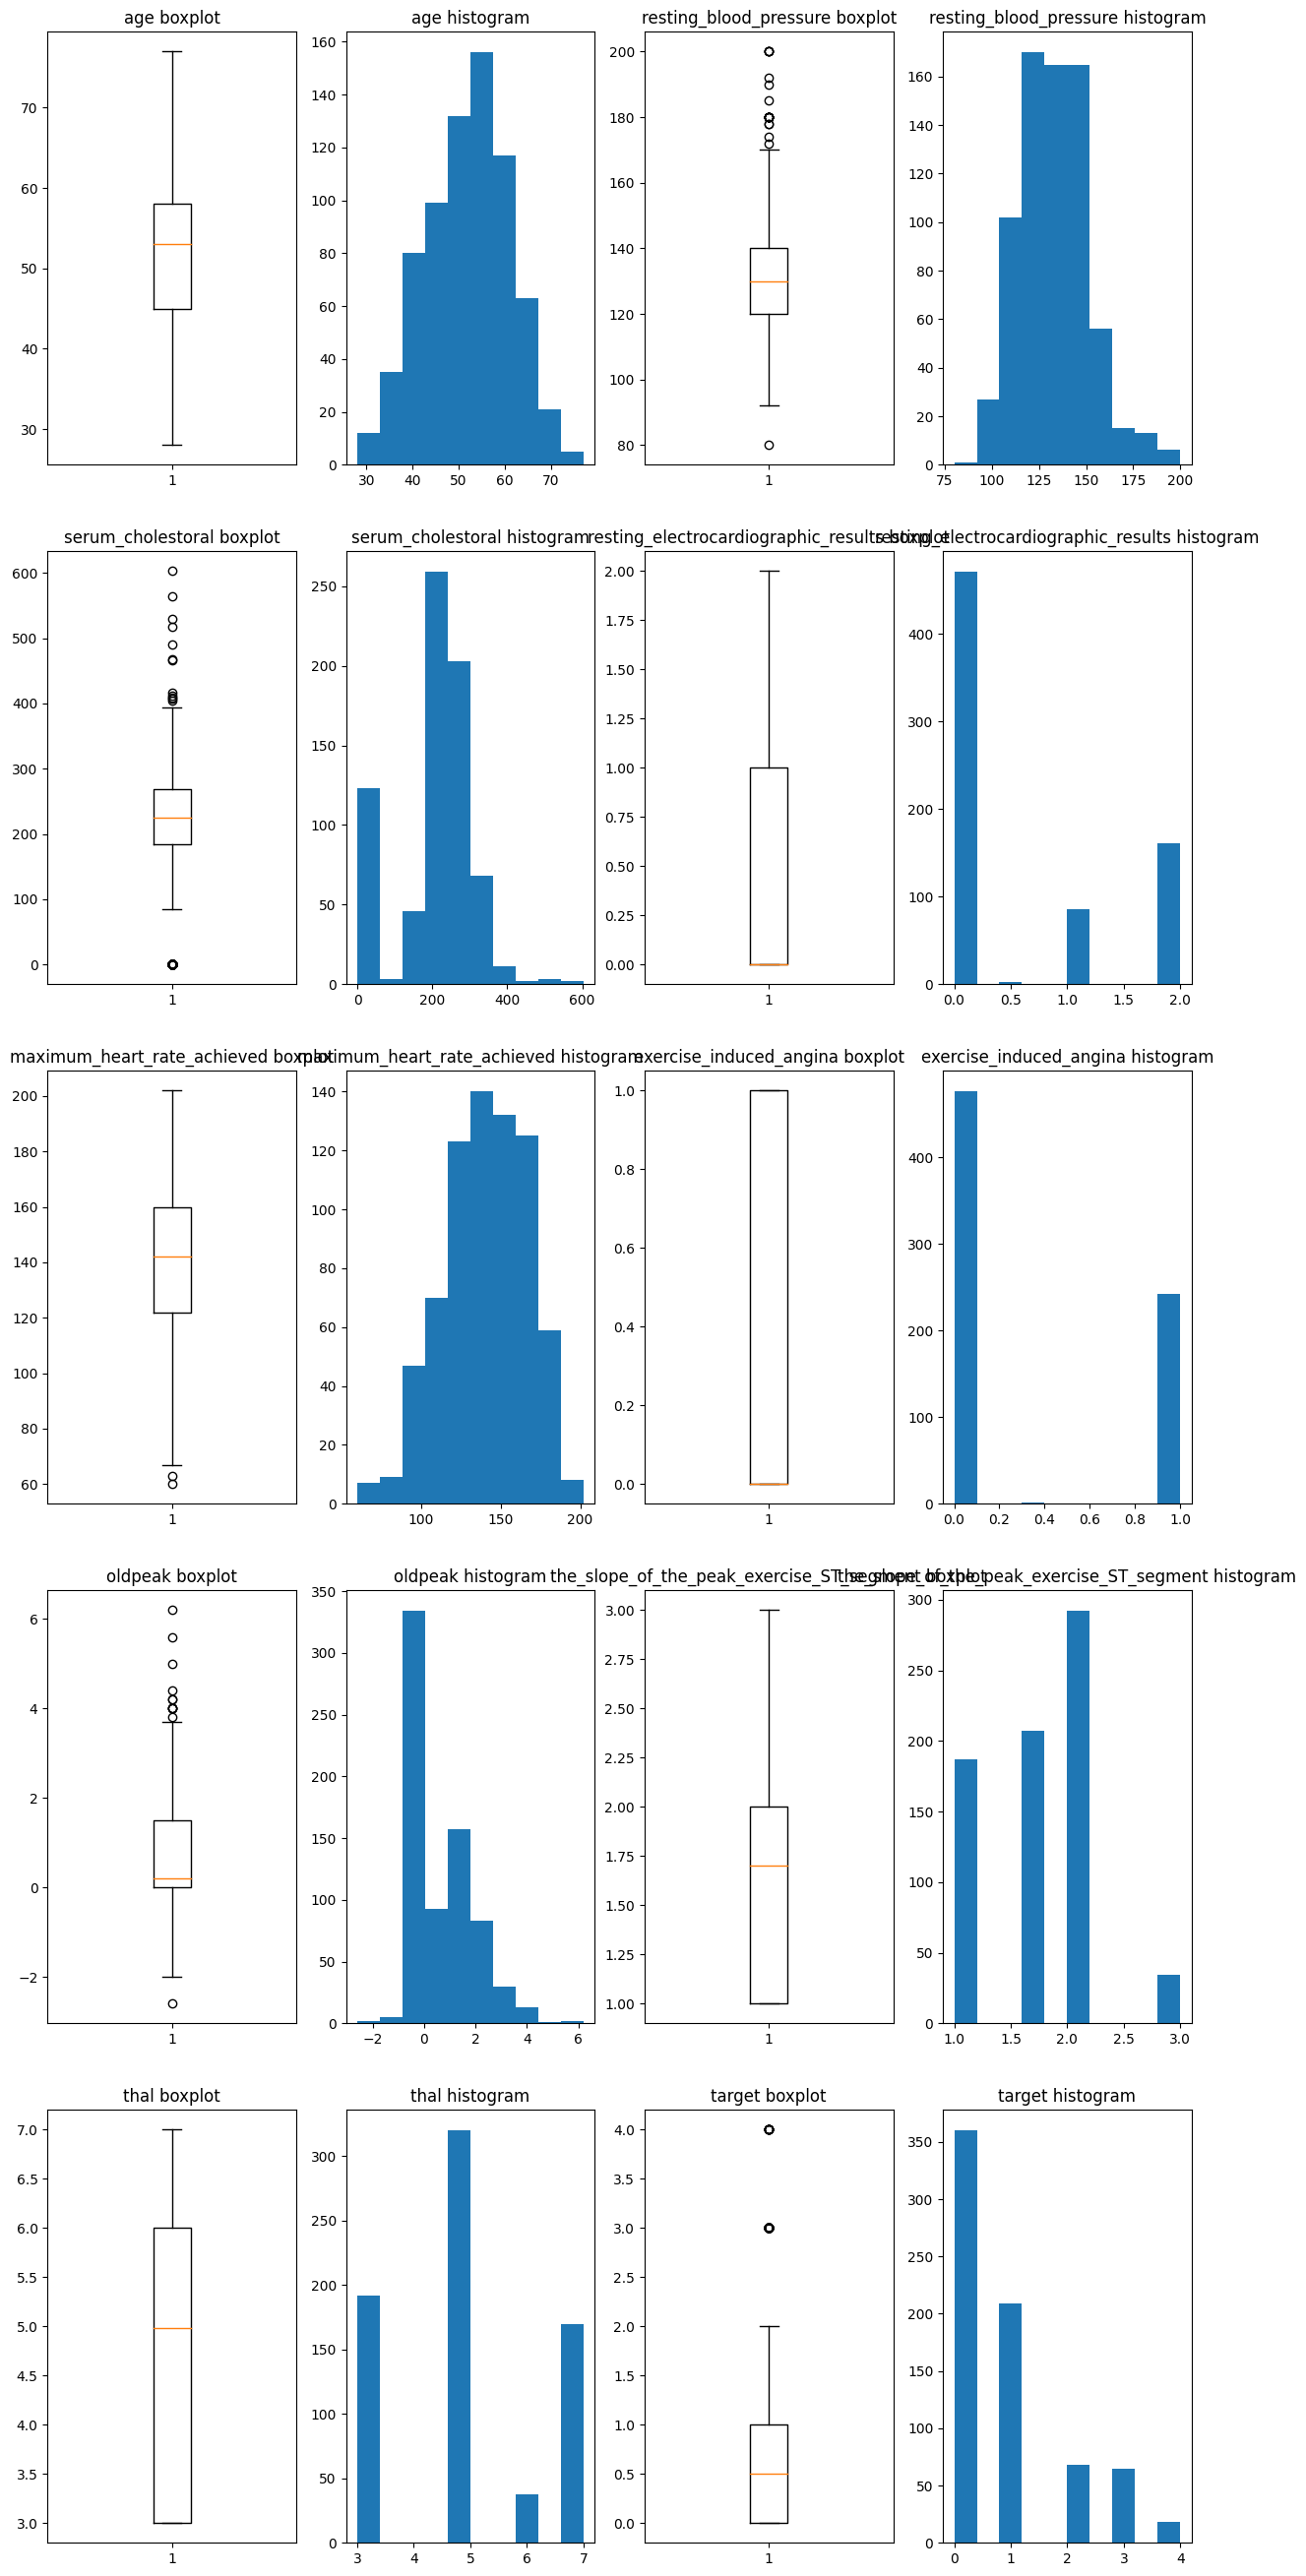

In [160]:
outliers_visual(df_modified)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen outliers para algunas de las variables dentro del dataset:
- normalized_losses
- wheel_base
- width
- engine_size
- stroke
- compression_ratio
- horse_power
- city_mpg
- highway_mpg
- price

Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [ ]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [ ]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df_modified.select_dtypes('number').columns):
    if outlier_count(col, df_modified) > 0:
        cont_vars.append(col)

Teniendo en cuenta los gráficos previos y los estadísticos, se puede ver que existen cantidades diferentes de outliers para cada variable y hacia diferentes direcciones. Limitaremos a través de winsorizing

In [ ]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [ ]:
# Verificación de la winsorizing
wins_dict = {}
wins_dict = test_wins(cont_vars[0], df_modified, wins_dict, upper_limit=.04, show_plot=True)
wins_dict = test_wins(cont_vars[1], df_modified, wins_dict, upper_limit=.015, show_plot=True)
wins_dict = test_wins(cont_vars[2], df_modified, wins_dict, lower_limit=.005, show_plot=True)
wins_dict = test_wins(cont_vars[3], df_modified, wins_dict, upper_limit=.04, show_plot=True)
wins_dict = test_wins(cont_vars[4], df_modified, wins_dict, upper_limit=.05, show_plot=True)
wins_dict = test_wins(cont_vars[5], df_modified, wins_dict, lower_limit=.09, upper_limit=.04, show_plot=True)
wins_dict = test_wins(cont_vars[6], df_modified, wins_dict, lower_limit=.09, upper_limit=.11, show_plot=True)
wins_dict = test_wins(cont_vars[7], df_modified, wins_dict, upper_limit=.03, show_plot=True)
wins_dict = test_wins(cont_vars[8], df_modified, wins_dict, upper_limit=.01, show_plot=True)
wins_dict = test_wins(cont_vars[9], df_modified, wins_dict, upper_limit=.01, show_plot=True)
wins_dict = test_wins(cont_vars[10], df_modified, wins_dict, upper_limit=.015, show_plot=True)
wins_dict = test_wins(cont_vars[11], df_modified, wins_dict, upper_limit=.12, show_plot=True)

In [ ]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for col in cont_vars:
            result[col] = self.wins[col]     
        return result

In [ ]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df_modified)
outliers_visual(df_wins)

### 4.2 Exploración de datos

#### Análisis univariado

In [ ]:
# Descriptores estadísticos para valores continuos
df_wins.describe()

In [ ]:
# Descriptores estadísticos para valores categóricos
df_wins.describe(include='O')

In [ ]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 40))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

In [ ]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_wins)

Luego de realizar la limpieza de datos, imputando datos y winsorizing, logramos percibir distribuciones menos segadas.

In [ ]:
df_wins.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

In [ ]:
df_wins['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

In [ ]:
df_wins.horse_power[np.abs(df_wins.horse_power-df_wins.horse_power.mean())<=(3*df_wins.horse_power.std())].hist(bins=5,color='blue');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power')

In [ ]:
df_wins['curb_weight'].hist(bins=5,color='blue')
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

In [ ]:
df_wins['drive_wheels'].value_counts().plot(kind='bar',color='blue')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')

In [ ]:
df_wins['num_of_doors'].value_counts().plot(kind='bar',color='blue')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors')

In [ ]:
df_wins['normalized_losses'].hist(bins=5,color='blue')
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')

A partir del anterior del anterior análisis obtenemos los siguientes hallazgos:

- Toyate es la comàñía que tiene más vehículos, más del 40% más que Nissan 
- El tipo de combustible más popular es el estándar con más del 80%.
- Front wheel drive es la primera elección en vehículos, siguidos de rear wheel y four wheel (muy pocos de estos últimos). 
- Curb weight está distribuida entre 1500 y 4000 aproximadamente
- Normalized losses, que no es más que el promedio de pérdidas por vehículo asegurado al año, tiene más número de carros en el rango de 90 a 140

#### Análisis Bivariado

Haciendo uso del diagrama de cajas y bigotes obtendremos un resumen visual de la distribución de cada una de las variables independientes con respecto a la dependiente, observando así la distribución de los distintos grupos.

In [ ]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Conociendo un poco acerca de las distribuciones de las variables con respecto a la variable objetivo, nos podemos dar una primera idea sobre cuáles características podrían resultar siendo más importantes al momento de influir en la variable objetivo. Esto resulta útil pues al incluirlas, nuestro modelo puede brindarnos mejores resultados en cuanto a correctitud de la predicción.

Observando las medianas de cada grupo (características) nos puede mostrar si verdaderamente existe una relación entre dicha variable independiente y la objetivo.

El tamaño de la caja nos puede mostrar la variabilidad dentro de esa característica.

Por ejemplo podemos notar que:

- normalized_losses evidentemente indica una relación directamente proporcional con el riesgo. Es decir, mayores pérdidas claramente indica mayor riesgo.
- wheel_base más alto, al igual que largo y ancho del vehículo parece asociarse con riesgo negativo o neutro
- mayor tamaño del motor asociado a mayor riesgo

Para ratificar algunos de estos descubrimientos utilizamos un diagrama de violín. Al ser estos unos diagramas que combinan los boxplots y los diagramas de densidad, nos pueden dar una noción de qué variables independientes pueden sernos de mayor untilidad para distinguir entre las distintas categorías de la variable objetivo.


In [ ]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.violinplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Vamos a ubicar los registros de acuerdo a su categoría, de manera que podamos dibujar nuestro diagrama de densidad.

In [ ]:
def categories(df):
    risks = {}
    risks['neg'] = df.loc[df.symboling == "-1"]
    risks['neutral'] = df.loc[df.symboling == "0"]
    risks['1'] = df.loc[df.symboling == "1"]
    risks['2'] = df.loc[df.symboling == "2"]
    risks['3'] = df.loc[df.symboling == "3"]
    return risks 

Con el diagrama de densidad se puede observar aquellas variables independientes que mejor 
discriminan las clases de la variable objetivo.

In [ ]:
risks = categories(df_wins)

i=1
fig = plt.figure(figsize=[20, 50])
for var_num in df_wins.select_dtypes('number').columns:
    ax = fig.add_subplot(8, 2, i)
    sns.kdeplot(risks['neg'][[var_num]].iloc[:,0], shade=True, color="b", label="Negative risk",palette='Set1')
    sns.kdeplot(risks['neutral'][[var_num]].iloc[:,0], shade=True, color="r", label="Neutral risk",palette='Set1')
    sns.kdeplot(risks['1'][[var_num]].iloc[:,0], shade=True, color="g", label="Risk = 1",palette='Set1')
    sns.kdeplot(risks['2'][[var_num]].iloc[:,0], shade=True, color="m", label="Risk = 2",palette='Set1')
    sns.kdeplot(risks['3'][[var_num]].iloc[:,0], shade=True, color="c", label="Risk = 3",palette='Set1')
    plt.legend()
    i+=1
fig.tight_layout()

Utilizando los gráficos de densidad logramos percibir que algunas features nos permiten distinguir la variable objetivo, mientras otras no nos brindan mayor información.

Dentro de las candidatas podríamos tener:
- normalized_losses
- wheel_base
- length
- city_mpg
- highway_mpg
- price


In [ ]:

ax = sns.pairplot(df_wins, vars=['normalized_losses','wheel_base', 'length', 
                                 'city_mpg', 'highway_mpg', 'price'], hue="symboling")

Haciendo uso de los pairplots de aquellas variables que mejor discriminaban la variable objetivo, intentamos encontrar combinaciones que nos ayuden a distinguir mejor los 5 grupos de riesgo que tenemos en nuestra variable objetivo symboling.

Definitivamente no resulta claro un par de variables que nos discrimene la variable objetivo

### Matriz de correlación

Vamos a utilizar la matriz de correlación para corroborar los indicios sobre las relaciones presentes entre algunas de las características y la variable objetivo.

El uso de la matriz de correlación es importante para conocer la correlación entre cada par de variables
- Las variables independientes a utilizar deberían estar altamente correlacionadas con la objetivo
- Se deben evitar problemas de multicolinealidad
- Las variables independientes no deben estar correlacionadas entre sí
- Si las variables independientes se encuentran altamente correlacionadas, el modelo puede presentar problemas al momento de entrenarlo e interpretarlo. No se podría aislar la relación entre cada variable independiente y la dependiente. Si no se pueden aislar los efectos, se pueden confundir dichos efectos
- Cuando las variables independientes están muy correlacionadas entre sí los cambios en una variable están asociados con cambios en otra variable y, por tanto, los coeficientes de regresión del modelo ya no van a medir el efecto de una variable independiente sobre la respuesta manteniendo constante, o sin variar, el resto de predictores. 
- Al contar con variables categóricas (la dependiente y varias dependientes) no podemos utilizar la matriz de correlación clásica que utiliza el coeficiente de correlación de Pearson ya que este tan sólo nos sirve para relación entre variables continuas.
- Al haber varias características categóricas utilizamos la función associations de dython que utiliza el coeficiente de Pearson para continuas vs continuas, la razón de correlación para continuas vs categóricas y Cramer's V o Theil's U para categóricas vs categóricas

In [ ]:

# Utilizamos la librería dython para identificar las variables categóricas y numéricas

from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio
categorical_features=identify_nominal_columns(df_wins)
continuous_features=identify_numeric_columns(df_wins)
categorical_features

In [ ]:

from dython.nominal import associations
complete_correlation= associations(df_wins, filename= 'complete_correlation.png', figsize=(20,20))


In [ ]:
target_correlation= associations(df_wins, display_rows=['symboling'], filename= 'target_correlation.png', figsize=(20,5))

Detallamos primero las variables independientes que más influencian a la objetivo (aunque ninguna tiene una alta correlación >= 0.7 o <= -0.7):
- num_of_doors
- normalized_losses
- wheel_base
- length
- height
- curb_weight

In [ ]:
# Obtenemos la matriz de correlación entre las variables continuas

selected_column= df_wins[continuous_features]
continuous_df = selected_column.copy()

continuous_correlation= associations(continuous_df, filename= 'continuous_correlation.png', figsize=(10,10))

Revisamos aquellas variables independientes continuas que pueden llegar a generar problemas al encontrarse altamente correlacionadas entre sí (problemas de multicolinealidad, redundancia, complejitud innecesaria del modelo):
- wheel_base y length 0.88
- wheel_base y width 0.8
- wheel_base y curb_weight 0.78
- lenght y width 0.85
- length y curb_weight 0.88
- length y engine_size 0.7
- length y highway_mpg -0.7
- length y price 0.7
- width y curb_weight 0.87
- width y engine_size 0.74
- width y price 0.77
- curb_weight y engine_size 0.87
- curb_weight y horse_power 0.78
- curb_weight y city_mpg -0.76
- curb_weight y highway_mpg -0.8
- curb_weight y price 0.85
- engine_size y horse_power 0.84
- engine_size y highway_mpg -0.7
- engine_size y price 0.8
- horse_power y city_mpg -0.85
- horse_power y highway_mpg -0.83
- horse_power y price 0.8
- city_mpg y highway_mpg 0.97
- city_mpg y price -0.74
- highway_mpg y price -0.75

In [ ]:
# Obtenemos la matriz de correlación entre las variables categoricas

selected_column= df_wins[categorical_features]
categorical_df = selected_column.copy()

categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

Revisamos aquellas variables independientes categóricas que pueden llegar a generar problemas al encontrarse altamente correlacionadas entre sí (redundacia y complejidad innecesaria del modelo):
- make y engine_location 0.7
- fuel_type y fuel_system 0.99
- num_of_doors y body_style 0.75

### 4.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

Las siguientes variables podemos considerarlas como altamente correlacionadas entre sí (correlación >= .7 o correlación <= -.7):

- city_mpg y highway_mpg: 0.97 (eliminamos city_mpg pues highway_mpg tiene una correlación ligeramente más alta con symboling)
- length y curb_weight: 0.88 (eliminamos curb_weight pues length tiene una correlación más alta con symboling)
- wheel_base y length: 0.88 (eliminamos length pues wheel_base tiene una correlación más alta con symboling)
- engine_size y horse_power: 0.84 (eliminamos engine_size pues horse_power tiene una correlación más alta con symboling)
- horse_power y highway_mpg: -0.83 (eliminamos horse_power pues highway_mpg tiene una correlación más alta con symboling)
- wheel_base y width: 0.8 (eliminamos width pues wheel_base tiene una correlación más alta con symboling)
- highway_mpg y price: -0.75 (eliminamos highway_mpg pues price tiene una correlación más alta con symboling)
- fuel_type y fuel_system 0.99 (eliminamos fuel_type pues fuel_system tiene una correlación más alta con symboling)
- num_of_doors y body_style: 0.75 (eliminamos body_style pues num_of_doors tiene una correlación más alta con symboling)
- make y engine_location: 0.7 (eliminamos engine_location pues make tiene una correlación más alta con symboling)


Puede resultar útil eliminar las variables que no se encuentren muy correlacionadas con symboling.
- stroke
- fuel_type
- aspiration
- drive_wheels
- num_of_cylinders
- compression_ratio

In [ ]:
print(correlation_ratio(categories=df_wins['symboling'],measurements=df_wins['city_mpg']))
print(correlation_ratio(categories=df_wins['symboling'],measurements=df_wins['highway_mpg']))

In [ ]:
# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def __init__(self,elims):
        self.elims = elims
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=self.elims)
        return result

In [ ]:
cols = ['city_mpg', 'curb_weight', 'length', 'engine_size', 'horse_power', 'wheel_base',
        'highway_mpg', 'fuel_type', 'body_style', 'engine_location', 'stroke', 'fuel_type',
        'aspiration', 'drive_wheels', 'num_of_cylinders', 'compression_ratio']

df_elims = Remove_highly_correlated_features(cols).fit_transform(df_wins)
df_elims

In [ ]:
# Creamos un Transformer personalizado para dummificar las variables categóricas
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = pd.get_dummies(result,columns=result.select_dtypes('object').drop(columns=['symboling']).columns,dtype=float)
        return result

In [ ]:
df_elims_dummified = Dummify().fit_transform(df_elims)
df_elims_dummified

Teniendo en cuenta que uno de los hallazgos importantes fue la alta correlación existente entre las variables independientes podemos aplicar PCA para reducir dimensiones y utilizar variables nuevas con mucha mayor información. 

Estandarizamos primero, pues de no hacerlo, al PCA basarse en distancias, se tendrán las variables nuevas fuertemente influenciadas por las variables originales de mayor escala.

In [ ]:
# Usamos el estarizador
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_wins.select_dtypes('number'))
df_scaled = pd.DataFrame(df_scaled, columns=df_wins.select_dtypes('number').columns)
df_scaled.head()

- Creamos el objeto PCA
- Entrenamos y transformamos los datos originales
- Los guardamos en un nuevo dataframe proyectado

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_projected = pca.fit_transform(df_scaled)

Vemos el dataset proyectado en las nuevas dimensiones

In [ ]:
df_projected

Observamos cada uno de los componentes principales resultantes del proceso

In [ ]:
pca.components_

Obtenemos la varianza explicada de cada uno de los componentes principales (nos damos cuenta que los primeros componentes tienen mayor varianza explicada)

In [ ]:
pca.explained_variance_

Miramos ahora el ratio de la varianza explicada

In [ ]:
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp) 
var_exp

Diagramamos con el objetivo de identificar los componentes principales necesarios, aquellos que en conjunto nos expliquen un porcentaje considerable de la varianza (80%-95%)

In [ ]:
labels = ['PC' + str(x) for x in range(1, len(var_exp)+1)]
plt.figure(figsize=(15, 7))
bars = plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', 
         tick_label=labels, color = 'g',hatch='//')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(var_exp[i]*100,1)}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

Encontramos que entre los primeros 4 componentes principales tenemos el 80.4% de la información


In [ ]:
np.sum(pca.explained_variance_ratio_[0:4])

Ahora utilizamos los 4 primeros componentes, obteniendo un dataframe con las nuevas variables. En este caso particular, como nuestro objetivo es la predicción, no vamos a caracterizar las nuevas variables (esto sería útil si quisiésemos interpretar los resultados utilizando las variables generadas por el PCA)



In [ ]:
pca = PCA(n_components=4)
pca_ = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_, columns=['pc1','pc2','pc3','pc4'],index=df.index)
print('\nFinal PCA:')
pca_df

In [ ]:
# Creamos un Transformer personalizado para realizar PCA sobre las variables numéricas
# Para dummificar las variables categóricas
class PCA_transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        cols = ['fuel_type', 'body_style', 'engine_location', 'stroke', 'fuel_type',
        'aspiration', 'drive_wheels', 'num_of_cylinders', 'compression_ratio']
        result = Remove_highly_correlated_features(cols).fit_transform(result)
        df_scaled = scaler.fit_transform(result.select_dtypes('number'))
        df_scaled = pd.DataFrame(df_scaled, columns=result.select_dtypes('number').columns)
        pca = PCA(n_components=4)
        pca_ = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(pca_, columns=['pc1','pc2','pc3','pc4'],index=df.index)
        for col in result.select_dtypes('object'):
            pca_df[col] = result[col] 
        pca_df = pd.get_dummies(pca_df,columns=pca_df.select_dtypes('object').drop(columns=['symboling']).columns,dtype=float)
        return pca_df

In [ ]:
df_pca = PCA_transformer().fit_transform(df_wins)
df_pca

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [ ]:
from sklearn.pipeline import Pipeline

elims = ['city_mpg', 'curb_weight', 'length', 'engine_size', 'horse_power', 'wheel_base',
        'highway_mpg', 'fuel_type', 'body_style', 'engine_location', 'stroke', 'fuel_type',
        'aspiration', 'drive_wheels', 'num_of_cylinders', 'compression_ratio']

pipe_rem = Pipeline(steps = [('format target variable',Format_target()),
                   ('format features',Format_variables()),
                   ('impute null values',Imputer(cont,cat)),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Remove highly correlated features',Remove_highly_correlated_features(elims)),
                   ('Dummify categorical variables',Dummify())])

pipe_pca_rem = Pipeline(steps = [('format target variable',Format_target()),
                   ('format features',Format_variables()),
                   ('impute null values',Imputer(cont,cat)),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('PCA',PCA_transformer())])


df_pipeline_rem = pipe_rem.fit_transform(df)
df_pipeline_pca_rem = pipe_pca_rem.fit_transform(df)

In [ ]:
# Construimos una función que nos permite obetener el X y el y para el dataframe de carros

def obtain_X_y(df):
    return df.drop(columns=['symboling']),df[['symboling']]

### 5. Protocolos de evaluación

In [ ]:
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

# Particionamos los datos para nuestra primer versión
X['rem'], y['rem'] = obtain_X_y(df_pipeline_rem)

X_train['rem'], X_test['rem'], y_train['rem'], y_test['rem'] = train_test_split(X['rem'],y['rem'],random_state=1234,test_size=0.3)
print(X_train['rem'].shape)
print(X_test['rem'].shape)
print(y_train['rem'].shape)
print(y_test['rem'].shape)

In [ ]:
# Particionamos los datos para nuestra segunda versión
X['pca_rem'], y['pca_rem'] = obtain_X_y(df_pipeline_pca_rem)

X_train['pca_rem'], X_test['pca_rem'], y_train['pca_rem'], y_test['pca_rem'] = train_test_split(X['pca_rem'],y['pca_rem'],random_state=1234,test_size=0.3)
print(X_train['pca_rem'].shape)
print(X_test['pca_rem'].shape)
print(y_train['pca_rem'].shape)
print(y_test['pca_rem'].shape)

### 6. Métricas de evaluación

Implementamos una función que nos permita calcular las métricas de regresión para el conjunto de entrenamiento y de prueba (Accuracy, Kappa, Precision, Recall)

Nos retornará el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de entrenamiento y el de prueba
- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- Kappa = (OA - AC) / (1 - AC)
- Precision = TP / (TP + FP) (valor positivo predicho, la proporción correcta de identificaciones positivas)
- Recall = TP / (TP + FN) (la proporción de positivos que fueron identificados correctamente)

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score

def classification_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train,average=None,labels=['-1','0','1','2','3'])
    prec_test = precision_score(y_test, y_pred_test,average=None,labels=['-1','0','1','2','3'])
    recall_train = recall_score(y_train, y_pred_train,average=None,labels=['-1','0','1','2','3'])
    recall_test = recall_score(y_test, y_pred_test,average=None,labels=['-1','0','1','2','3'])   
    metrics = {"Training Accuracy": acc_train,
               "Test Accuracy": acc_test,
               "Training Kappa": kappa_train,
               "Test Kappa": kappa_test,
               "Training Precision": prec_train,
               "Test Precision": prec_test,
               "Training recall": recall_train,
               "Test recall": recall_test    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def kappa_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    return kappa_train, kappa_test

### Baseline a partir del dummy classifier

Establecemos la línea base a partir de un dummy classifier que utiliza como estrategia la moda (ya que estamos trabajando con una tarea de clasificación)

In [ ]:
from sklearn.dummy import DummyClassifier

classification_metrics(DummyClassifier(strategy='most_frequent'),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 30%, Test Accuracy = 37%

### Reporte de métricas y matriz de confusión

Vamos a definir una función para dibujar la matriz de confusión y el reporte de clasificación en donde podemos obtener las métricas de entrenamiento y prueba

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

def report_and_conf_matrix(model,X_train,X_test,y_train,y_test):
    md = model.fit(X_train,y_train)
    y_pred_train = md.predict(X_train)
    y_pred_test = md.predict(X_test)
    cnf_matrix1 = confusion_matrix(y_train, y_pred_train)
    cnf_matrix2 = confusion_matrix(y_test, y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix1, classes=["-1","0","1","2","3"],
                      title='Matriz de confusión Entrenamiento')
    print("Reporte Entrenamiento")  
    print(classification_report(y_train, y_pred_train, target_names=["-1","0","1","2","3"]))
    plt.show()
    plt.figure()
    plot_confusion_matrix(cnf_matrix2, classes=["-1","0","1","2","3"],
                      title='Matriz de confusión Prueba')
    print("Reporte Prueba")  
    print(classification_report(y_test, y_pred_test, target_names=["-1","0","1","2","3"]))
    plt.show()



### Área bajo la curva ROC

Vamos a utilizar el área bajo la curva ROC para evaluar nuestro modelo también. Con esta gráfica vamos a poder visualizar el desempeño del modelo entre la sensibilidad (recall - true positive rate) y la especificidad (true negative rate 1 - FPR), de manera que podamos establecer un balance entre ambos.
- La curva ROC hace un plot entre el TPR y el FPR
- Recall es la habilidad para identificar correctamente las observaciones que son positivas
- Especificidad es la habilidad para indentificar correctamente las observaciones que son negativas
- AUC ROC nos permite identificar que tan bien nuestro modelo puede distinguir entre las clases. 

Al tener nosotros un problema multi - clase utilizaremos una metodología uno vs el resto. Se tendrán tantas curvas como clases. Yellowbrick es muy útil y simple para esto

- Utilizando las curvas individuales podemos ver que tan bien nuestro modelo trabaja para cada una de las categorías 

- La curva micro-average ROC agrega todas las instancias sobre todas las clases y nos brinda una sola curva para todas las predicciones (afectada por la moda).

- La curva macro-average ROC trata clase de manera independiente y nos presenta una curva ROC que es el promedio de los valores para cada clase (cada clase tiene la misma importancia).

In [ ]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={'-1': 'riesgo negativo',
                                        '0': 'neutral', 
                                        '1': 'riesgo 1', 
                                        '2': 'riesgo 2',
                                        '3': 'riesgo 3'})                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

Podemos observar el funcionamiento de la curva ROC y el área bajo ella utilizando uno de los modelos más sencillos para abordar tareas de clasificación, la regresión logística.

In [ ]:
plot_ROC_curve(LogisticRegression(random_state=1234), X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

In [ ]:
plot_ROC_curve(LogisticRegression(random_state=1234), X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

Se puede observar que el conjunto de datos al que se le ha realizado el PCA presenta mucho mejor desempeño. Más adelante ahondaremos más en esto.

### 7. Implementación de modelos

#### 7.1. Modelo de Regresión Logística

Trabajamos sobre el conjunto de datos con eliminación de variables altamente correlacionadas entre sí.

In [ ]:
from sklearn.linear_model import LogisticRegression

classification_metrics(LogisticRegression(random_state=1234),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
# Guardamos el mejor modelo con regresión logística

import pickle
from sklearn.linear_model import LogisticRegressionCV

model,metrics = classification_metrics(LogisticRegressionCV(cv=5,random_state=1234),
                                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/logisticRegressionRem.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemMetrics.pkl', 'wb'))

Dentro del contexto en el que nos encontramos trabajando, sería bueno entender que tipo de errores desearíamos que nuestro modelo evitara.

Teniendo en cuenta que actuamos como una compañía aseguradora y queremos predecir el riesgo, quizás sería más importante al tomar como positiva la categoría más riesgosa, predecir que no es riesgosa y que sí lo sea (FN), es decir un recall más alto. Por otro lado al tomar como positiva la categoría menos riesgosa y predecir que no es riesgosa y que sí lo sea es un problema (FP), es decir una precision más alta.

In [ ]:
# Los hiperparámetros del mejor modelo de regresión logística

model.get_params()

In [ ]:
report_and_conf_matrix(LogisticRegressionCV(cv=5,random_state=1234),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Obtenemos el reporte y la matriz de confusión para nuestro mejor modelo de regresión logística con todas las variables.

Con base en el reporte de entrenamiento podemos observar dos métricas importantes
- Precision (para ver si tenemos un nivel alto de correctitud para la clase positiva). Una mayor precision disminuye los falsos positivos (en este caso desearíamos mayor precisión sobre las categorías de menos riesgo)
- Recall (para ver qué porcentaje de las muestras puede el modelo identificar que pertenecen a la clase positiva). Un mayor recall indica que los falsos negativos disminuyen (en este caso desearíamos mayor sensibilidad sobre las categorías de mayor riesgo)

La exactitud para la prueba de nuestro modelo es del 68%, mucho mejor que el presentado en el baseline que era del 37%

La precisión para la clase menos riesgosa es de 80% 

La sensibilidad para la clase más riesgosa de 86% 

Ambas parecen adecuadas teniendo en cuenta el contexto del problema.

In [ ]:
plot_ROC_curve(LogisticRegressionCV(cv=5,random_state=1234), 
               X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

- La curva micro-average arroja un valor adecuado de 0.85
- La curva macro-average arroja un valor adecuado de 0.83
- Aunque el modelo parece funcionar bien para las clases riesgo negativo y y riesgo 3, definitivamente no es tan correcto con la clase riesgo 2.

Aunque previamente, en la etapa de ingeniería de características habíamos creado nuevas variables y eliminado otras, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos. 

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

### Selección de características

En este caso hacemos uso de SelectKBest que nos permite seleccionar las k mejores variables independientes teniendo en cuenta el f_classif. Construimos una función que a partir del conjunto de entrenamiento y el de prueba nos retorna los conjuntos ya transformados

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
def select_features(X_train, y_train, X_test,n):
  fs = SelectKBest(score_func=f_classif, k=n)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

Revizamos la importancia de las variables en el conjunto de datos sin PCA

In [ ]:
# Haciendo uso de los conjuntos ya transformados podemos ver el score de cada variable
# En este caso utilizamos todas las variables

n = X_train['rem'].shape[1]

X_train['rem_fs'], X_test['rem_fs'], fs = select_features(X_train['rem'], y_train['rem'], X_test['rem'],n)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set(title='Ranking de características',xlabel='Características',ylabel='Scores')
plt.show()

In [ ]:
# Haciendo uso de un modelo de Random Forest Classifier hacemos un ranking de características
# Ordenamos y graficamos

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=150,random_state=1234)
rf.fit(X_train['rem'], y_train['rem'])
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(df_pipeline_rem.columns[1:][sort], rf.feature_importances_[sort])
plt.xlabel("Importancia de características")
l = len(df_pipeline_rem.columns[1:])
importants = df_pipeline_rem.columns[1:][sort][-5:]
print(importants)


Revisamos el ranking de variables para el conjunto de datos con PCA

In [ ]:
rf = RandomForestClassifier(n_estimators=150,random_state=1234)
rf.fit(X_train['pca_rem'], y_train['pca_rem'])
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(df_pipeline_rem.columns[1:][sort], rf.feature_importances_[sort])
plt.xlabel("Importancia de características")
l = len(df_pipeline_pca_rem.columns[1:])
importants = df_pipeline_pca_rem.columns[1:][sort][-5:]
print(importants)

Revisamos la cantidad de variables a seleccionar para el conjunto de datos sin PCA

In [ ]:
from sklearn.pipeline import make_pipeline

n = X_train['rem'].shape[1]
results = [kappa_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=i),
                                                 StandardScaler(),
                                                 RandomForestClassifier(n_estimators=150,random_state=1234)),
            X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])[1] for i in range(1,n)]
ax = sns.lineplot(x=range(1,n),
             y=results)
ax.set(title="Kappa vs K selected features",ylabel='Kappa',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,n))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Cantidad de variables a seleccionar para conjunto de datos sin PCA k = 31

Revisamos la cantidad de variables a seleccionar del conjunto de datos con PCA

In [ ]:
n = X_train['pca_rem'].shape[1]
results = [kappa_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=i),
                                                 StandardScaler(),
                                                 RandomForestClassifier(n_estimators=150,random_state=1234)),
            X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])[1] for i in range(1,n)]
ax = sns.lineplot(x=range(1,n),
             y=results)
ax.set(title="Kappa vs K selected features",ylabel='Kappa',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,n))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Cantidad de variables a seleccionar para conjunto de datos con PCA k = 27

In [ ]:
# Modelo de regresión logística utilizando datos sin PCA y feature selection de 31 variables

model,metrics = classification_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234)),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/logisticRegressionRemFS.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemFSMetrics.pkl', 'wb'))

In [ ]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234))
report_and_conf_matrix(pipeline_lr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

La exactitud para la prueba de nuestro modelo es del 66%

La precisión para la clase menos riesgosa es de 80% 

La sensibilidad para la clase más riesgosa de 71% 

In [ ]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234))
plot_ROC_curve(pipeline_lr, X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

- La curva micro-average arroja un valor adecuado de 0.85
- La curva macro-average arroja un valor adecuado de 0.82
- Aunque el modelo parece funcionar bien para las clases riesgo negativo y y riesgo 3, definitivamente no es tan correcto con la clase riesgo 2.

Modelo de regresión logistica sobre conjunto de datos con PCA

In [ ]:
model,metrics = classification_metrics(LogisticRegressionCV(cv=5,random_state=1234),
                                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/logisticRegressionPCARem.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionPCARemMetrics.pkl', 'wb'))

In [ ]:
report_and_conf_matrix(LogisticRegressionCV(cv=5,random_state=1234),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

La exactitud para la prueba de nuestro modelo es del 81%

La precisión para la clase menos riesgosa es de 71% 

La sensibilidad para la clase más riesgosa de 86% 

In [ ]:
plot_ROC_curve(LogisticRegressionCV(cv=5,random_state=1234), 
               X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

- La curva micro-average arroja un valor muy bueno de 0.95
- La curva macro-average arroja un valor muy bueno de 0.96

Modelo de Regresión logística sobre conjunto de datos con PCA y feature selection

In [ ]:
# Modelo de regresión logística utilizando datos con PCA y feature selection de 27 variables

model,metrics = classification_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=27),
                                                 LogisticRegressionCV(cv=5,random_state=1234)),
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/logisticRegressionPCARemFS.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionPCARemFSMetrics.pkl', 'wb'))

In [ ]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            LogisticRegressionCV(cv=5,random_state=1234))
report_and_conf_matrix(pipeline_lr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

La exactitud para la prueba de nuestro modelo es del 76%

La precisión para la clase menos riesgosa es de 83% 

La sensibilidad para la clase más riesgosa de 86%

In [ ]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            LogisticRegressionCV(cv=5,random_state=1234))
plot_ROC_curve(pipeline_lr,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

- La curva micro-average arroja un valor muy bueno de 0.95
- La curva macro-average arroja un valor muy bueno de 0.95

### 7.3. Modelo de K vecinos más cercanos

Para este modelo tan solamente incluimos las variables continuas, pues es un método basado en distancias. No tienen sentido utilizar las variables categóricas dummificadas

In [ ]:
# Escalamos y estandarizamos para ver los resultados del modelo

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsClassifier())
cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
classification_metrics(knnReg_norm,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])

In [ ]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la normalización y el clasificador knn 

cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
    classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
    print()

In [ ]:
# Visualizamos el kappa
# Observamos la mejor respuesta con k=1

cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
results = [kappa_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i)),
            X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="Kappa vs K neighbors",ylabel='Kappa',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [ ]:
# Guardamos el mejor modelo utilizando k=1 sin PCA

cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
model,metrics = classification_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                                   X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/KnnClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnClassifierRemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                       X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'])

La exactitud para la prueba de nuestro modelo es del 73%

La precisión para la clase menos riesgosa es de 80% 

La sensibilidad para la clase más riesgosa de 71%

In [ ]:
plot_ROC_curve(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                X_train=X_train['rem'][cols], y_train=y_train['rem'],X_test=X_test['rem'][cols], y_test=y_test['rem'])

Obtenemos peores resultados que con la regresión logística, las AUC micro y macro son de 0.83 y 0.8 respectivamente. Aunque aceptables, peores que los obtenidos previamente

Ahora trabajamos con el dataset con PCA

In [ ]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la normalización y el clasificador knn 

cols = ['pc1','pc2','pc3','pc4']
for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
    classification_metrics(knnReg_st,X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])
    print()

In [ ]:
# Visualizamos el kappa
# Observamos la mejor respuesta con k=1

cols = ['pc1','pc2','pc3','pc4']
knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
results = [kappa_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i)),
            X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="Kappa vs K neighbors",ylabel='Kappa',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [ ]:
# Guardamos el mejor modelo utilizando k=1 sin PCA

cols = ['pc1','pc2','pc3','pc4']
model,metrics = classification_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                                   X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/KnnClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                       X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                X_train=X_train['pca_rem'][cols], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'][cols], y_test=y_test['pca_rem'])

### 7.4. Modelo Naïve Bayes

Utilizamos primero el conjunto de datos sin PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

classification_metrics(GaussianNB(),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train['rem'], y_train['rem'])

In [ ]:
# Mejores hiperparámetros

gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
# Guardamos el mejor modelo utilizando el dataset sin PCA

model,metrics = classification_metrics(GaussianNB(var_smoothing=1.232846739442066e-08),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/NBClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(GaussianNB(var_smoothing=1.232846739442066e-08),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
plot_ROC_curve(GaussianNB(var_smoothing=1.232846739442066e-08),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Trabajamos con el conjunto de datos sin PCA pero con feature selection

In [ ]:
nb_classifier = GaussianNB()

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'], y_train['rem'])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_t, y_train['rem'])

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
# Guardamos el mejor modelo sin PCA utilizando feature selection

pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))

model,metrics = classification_metrics(pipeline_nb,
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/NBClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))
report_and_conf_matrix(pipeline_nb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))
plot_ROC_curve(pipeline_nb,X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Utilizamos el conjunto de datos con PCA

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train['pca_rem'], y_train['pca_rem'])

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
# Guardamos el mejor modelo utilizando el dataset con PCA

model,metrics = classification_metrics(GaussianNB(var_smoothing=0.0657933224657568),
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/NBClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierPCARemMetrics.pkl','wb'))

Utilizamos el conjunto de datos con PCA y con feature selection

In [ ]:
nb_classifier = GaussianNB()

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'], y_train['pca_rem'])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_t, y_train['pca_rem'])

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
# Guardamos el mejor modelo sin PCA utilizando feature selection

pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))

model,metrics = classification_metrics(pipeline_nb,
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/NBClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))
report_and_conf_matrix(pipeline_nb,
                X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))
plot_ROC_curve(pipeline_nb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

### 7.5. Modelo de Árbol de Clasificación

Conjunto de datos sin PCA

In [ ]:
# Utilizamos un árbol de clasificación
# Verificamos sus métricas

from sklearn.tree import DecisionTreeClassifier, plot_tree

classification_metrics(DecisionTreeClassifier(random_state=1234),X_train['rem'],X_test['rem'],y_train['pca_rem'],y_test['pca_rem'])

tree_reg = DecisionTreeClassifier(random_state=1234).fit(X_train['rem'],y_train['rem'])
print(tree_reg)

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

In [ ]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de clasificación
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo aprox = 9s 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

kappa_scorer = make_scorer(cohen_kappa_score)
tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),
                          param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_train['rem'],y_train['rem'])

In [ ]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

In [ ]:
# El mejor modelo de árbol de clasificación sin PCA


tree_clsfr = DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best')

model,metrics = classification_metrics(tree_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/DecissionTreeClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierRemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(DecisionTreeClassifier(random_state=1234,max_depth=11,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best'),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
plot_ROC_curve(DecisionTreeClassifier(random_state=1234,max_depth=11,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best'),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Conjunto de datos sin PCA y con feature selection

In [ ]:
# Tiempo aproximado: 8s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_t,y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de árbol de regresión sin PCA
# Con feature selection

pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))

model,metrics = classification_metrics(pipeline_dt,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/DecissionTreeClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))
report_and_conf_matrix(pipeline_dt,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))
plot_ROC_curve(pipeline_dt,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

Modelo con conjunto de datos con PCA

In [ ]:
# Tiempo aproximado: 11s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),
                          param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de árbol de clasificación con PCA


tree_clsfr = DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = classification_metrics(tree_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/DecissionTreeClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve(DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

Modelo con conjunto de datos con PCA y feature selection

In [ ]:
# Tiempo aproximado: 9s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_t,y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de árbol de regresión con PCA
# Con feature selection

pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))

model,metrics = classification_metrics(pipeline_dt,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/DecissionTreeClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))
report_and_conf_matrix(pipeline_dt,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))
plot_ROC_curve(pipeline_dt,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

### 7.6. Modelo de Random Forest

Conjunto de datos sin PCA

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1234)

classification_metrics(rf,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

rf.fit(X_train['rem'],y_train['rem'])
print(rf.get_params())

In [ ]:
# Tiempo aproximado: 2m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_train['rem'],y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Random Forest
# Sin PCA


rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)

model,metrics = classification_metrics(rf_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/RandomForestClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierRemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
plot_ROC_curve(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Modelo sin PCA pero con feature selection

In [ ]:
# Tiempo aproximado: 3m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_t,y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de random forest sin PCA
# Con feature selection

rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200)

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

model,metrics = classification_metrics(rf_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/RandomForestClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200))
report_and_conf_matrix(pipeline_rf,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200))
plot_ROC_curve(pipeline_rf,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

Modelo con conjunto de datos con PCA

In [ ]:
# Tiempo aproximado: 2m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Random Forest
# Con PCA


rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400)

model,metrics = classification_metrics(rf_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/RandomForestClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

Modelo con PCA y feature selection

In [ ]:
# Tiempo aproximado: 3m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_t,y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de random forest con PCA
# Con feature selection

rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

model,metrics = classification_metrics(rf_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/RandomForestClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                          RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100))
report_and_conf_matrix(pipeline_rf,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100))
plot_ROC_curve(pipeline_rf,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'], X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

### 7.7. Modelo de Gradient Boosting

Modelo con datos sin PCA

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1234)

classification_metrics(gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

gb.fit(X_train['rem'],y_train['rem'])
print(gb.get_params())

In [ ]:
#Tiempo aproximado: 15m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['rem'],y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Gradient Boosting
# Sin PCA
 

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/GradientBoostingClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierRemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
plot_ROC_curve(GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Conjunto de datos sin PCA y con feature selection

In [ ]:
#Tiempo aproximado: 13m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Gradient Boosting sin PCA
# Con feature selection


pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))

model,metrics = classification_metrics(pipeline_gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/GradientBoostingClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))
report_and_conf_matrix(pipeline_gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))
plot_ROC_curve(pipeline_gb,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

Modelo con PCA

In [ ]:
#Tiempo aproximado: 17m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Gradient Boosting
# Con PCA
 

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/GradientBoostingClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve(GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

Modelo con PCA y feature selection

In [ ]:
#Tiempo aproximado: 70m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
# El mejor modelo de Gradient Boosting
# Con PCA y feature selection
 
X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/GradientBoostingClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5))
report_and_conf_matrix(pipeline_gb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5))
plot_ROC_curve(pipeline_gb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

### 7.8. Modelo de XGBoost

In [ ]:
y_train['rem']['symboling'].unique()

Conjunto de datos sin PCA

In [ ]:
# Tiempo aproximado: 7m

import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['rem'] = le.fit_transform(y_train['rem'])
y_test['rem'] = le.transform(y_test['rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['rem'],y_train['rem'])

In [ ]:
xgb_clsfr = xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1)

model,metrics = classification_metrics(xgb_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/XGBoostClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierRemMetrics.pkl','wb'))

In [ ]:
def plot_ROC_curve_xgb(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={0: 'riesgo negativo',
                                        1: 'neutral', 
                                        2: 'riesgo 1', 
                                        3: 'riesgo 2',
                                        4: 'riesgo 3'})                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

In [ ]:
tuning_model.best_params_

In [ ]:
report_and_conf_matrix(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
plot_ROC_curve_xgb(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Conjunto de datos sin PCA y feature selection

In [ ]:
# Tiempo aproximado: 7m

le = LabelEncoder()
y_train['rem'] = le.fit_transform(y_train['rem'])
y_test['rem'] = le.transform(y_test['rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:

pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

model,metrics = classification_metrics(pipeline_xgb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])
pickle.dump(model, open('models/XGBoostClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

report_and_conf_matrix(pipeline_xgb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

plot_ROC_curve_xgb(pipeline_xgb,X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'])

Conjunto de datos con PCA

In [ ]:
# Tiempo aproximado: 6m

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['pca_rem'] = le.fit_transform(y_train['pca_rem'])
y_test['pca_rem'] = le.transform(y_test['pca_rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
xgb_clsfr = xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1)

model,metrics = classification_metrics(xgb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/XGBoostClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve_xgb(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

Conjunto de datos con PCA y feature selection

In [ ]:
# Tiempo aproximado: 9m

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

model,metrics = classification_metrics(pipeline_xgb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/XGBoostClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

report_and_conf_matrix(pipeline_xgb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

plot_ROC_curve_xgb(pipeline_xgb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'],X_test=X_test['pca_rem'], y_test=y_test['pca_rem'])

### 8. Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados 

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/logisticRegressionRemMetrics.pkl','rb')))
names.append('logisticRegressionRemMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionRemFSMetrics.pkl','rb')))
names.append('logisticRegressionRemFSMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionPCARemMetrics.pkl','rb')))
names.append('logisticRegressionPCARemMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionPCARemFSMetrics.pkl','rb')))
names.append('logisticRegressionPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/KnnClassifierRemMetrics.pkl','rb')))
names.append('KnnClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/KnnClassifierPCARemMetrics.pkl','rb')))
names.append('KnnClassifiePCARemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierRemMetrics.pkl','rb')))
names.append('NBClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierRemFSMetrics.pkl','rb')))
names.append('NBClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierPCARemMetrics.pkl','rb')))
names.append('NBClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierPCARemFSMetrics.pkl','rb')))
names.append('NBClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierRemMetrics.pkl','rb')))
names.append('DecisionTreeClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierRemFSMetrics.pkl','rb')))
names.append('DecisionTreeClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierPCARemMetrics.pkl','rb')))
names.append('DecisionTreeClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierPCARemFSMetrics.pkl','rb')))
names.append('DecisionTreeClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierRemMetrics.pkl','rb')))
names.append('RandomForestClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierRemFSMetrics.pkl','rb')))
names.append('RandomForestClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierPCARemMetrics.pkl','rb')))
names.append('RandomForestClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierPCARemFSMetrics.pkl','rb')))
names.append('RandomForestClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierRemMetrics.pkl','rb')))
names.append('GradientBoostingClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierRemFSMetrics.pkl','rb')))
names.append('GradientBoostingClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierPCARemMetrics.pkl','rb')))
names.append('GradientBoostingClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierPCARemFSMetrics.pkl','rb')))
names.append('GradientBoostingClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierRemMetrics.pkl','rb')))
names.append('XGBoostClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierRemFSMetrics.pkl','rb')))
names.append('XGBoostClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierPCARemMetrics.pkl','rb')))
names.append('XGBoostClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierPCARemFSMetrics.pkl','rb')))
names.append('XGBoostClassifierPCARemFSMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al Accuracy de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Accuracy'] for i in metrics])
ax.set(title='Accuracy de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al Kappa de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Kappa'] for i in metrics])
ax.set(title='Kappa de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su Accuracy de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Accuracy'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Accuracy'])
for model in models:
    ranking = pd.concat([ranking, pd.DataFrame([{'Model':model[0],'Test Accuracy':model[1]['Test Accuracy']}])],ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su Kappa de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Kappa'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Kappa'])
for model in models:
    ranking = pd.concat([ranking, pd.DataFrame([{'Model':model[0],'Test Kappa':model[1]['Test Kappa']}])],ignore_index=True)
ranking